In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Spams.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2230,ham,Hey... Thk we juz go accordin to wat we discus...,NaN,NaN,NaN
4793,ham,Sorry that was my uncle. I.ll keep in touch,NaN,NaN,NaN
1156,ham,Hey.. Something came up last min.. Think i wun...,NaN,NaN,NaN
1613,ham,Thnx dude. u guys out 2nite?,NaN,NaN,NaN
49,ham,U don't know how stubborn I am. I didn't even ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.data cleaning
# 2.EDA
# 3.text preprocessing
# 4.model building
# 5.evaluation
# 6.improvements
# 7.website
# 8.deploy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
601,ham,If u sending her home first it's ok lor. I'm n...
3294,ham,Dunno lei Ì_ all decide lor. How abt leona? Oo...
433,ham,Booked ticket for pongal?
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...
363,ham,Busy here. Trying to finish for new year. I am...


In [10]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2353,spam,Please CALL 08712402902 immediately as there i...
4464,ham,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...
2985,spam,Reply to win å£100 weekly! What professional s...
330,ham,K.k:)apo k.good movie.
1317,spam,Win the newest ‰ÛÏHarry Potter and the Order o...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
#EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

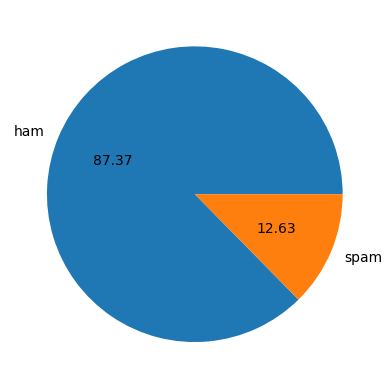

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
#data is imbalanced

In [24]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aditi
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#HAM
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

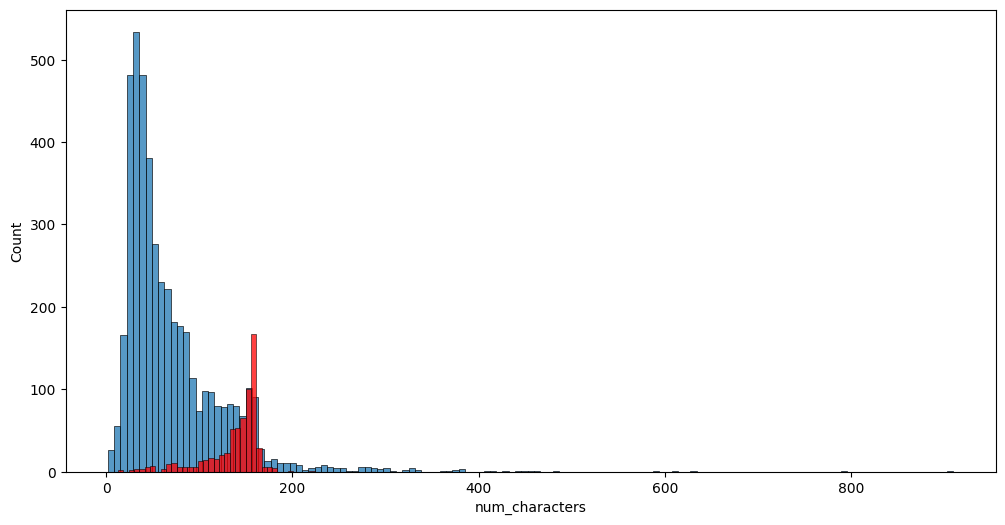

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

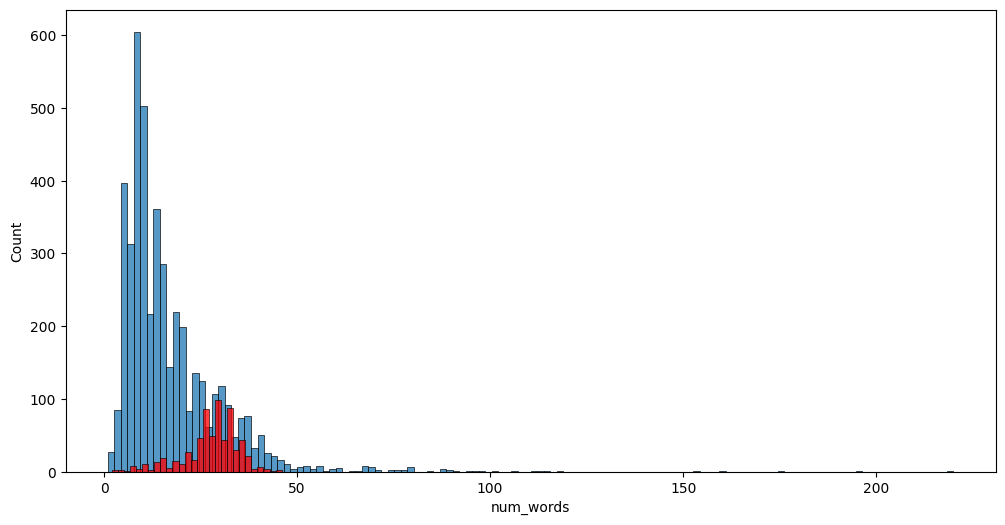

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

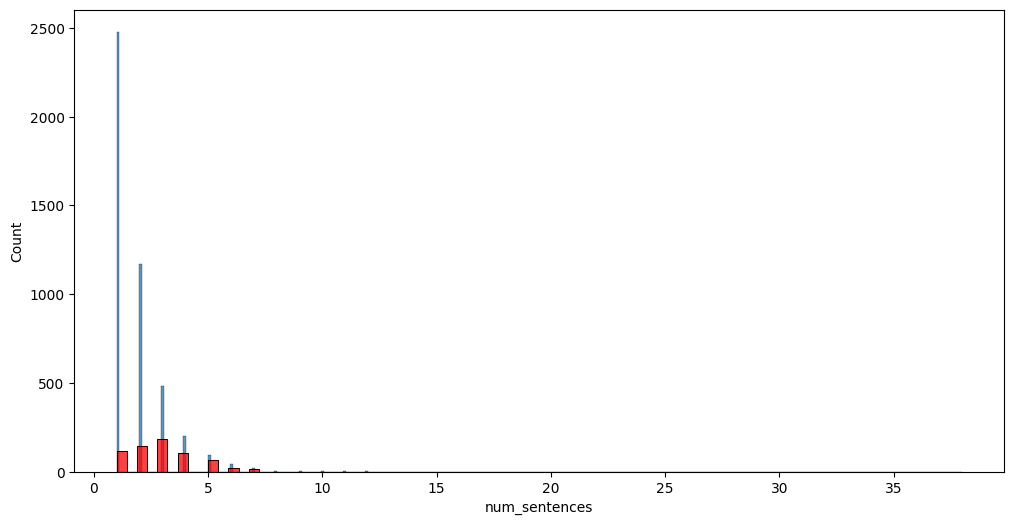

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

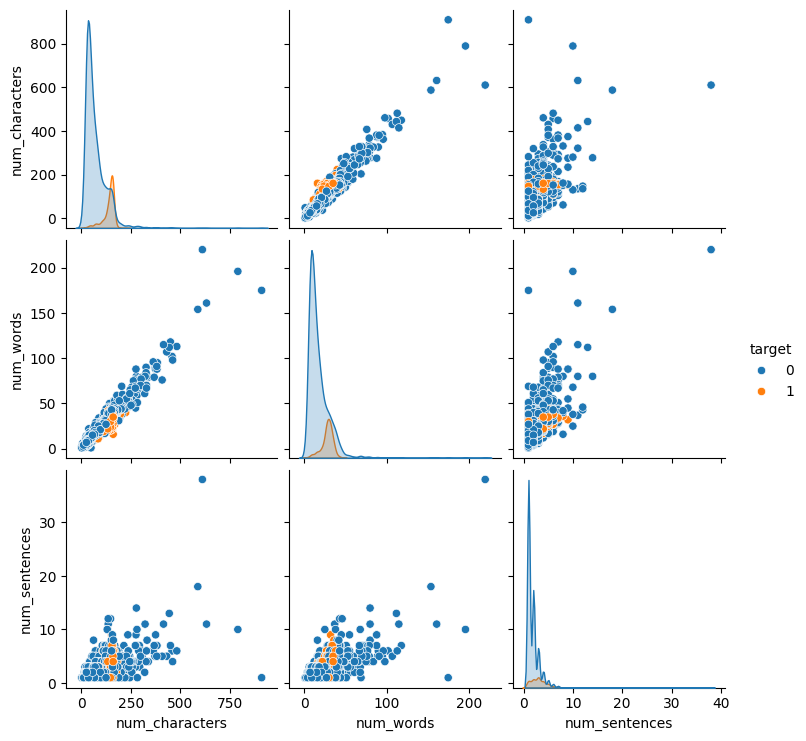

In [40]:
sns.pairplot(df,hue='target')

In [41]:
print(df.dtypes)

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [42]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
print(corr_matrix)

                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


In [43]:
df_clean = df.select_dtypes(include=['number'])  # Keep only numeric columns
corr_matrix = df_clean.corr()
print(corr_matrix)

                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


In [44]:
df_numeric = df.select_dtypes(include=['number'])

In [45]:
corr_matrix = df_numeric.corr()

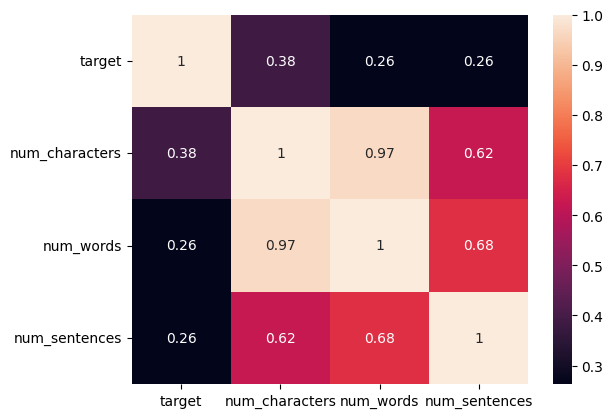

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [47]:
#data preprocessing

In [48]:
def transform_text(text):
     text = text.lower()
     text = nltk.word_tokenize(text)

     y= []
     for i in text:
         if i.isalnum():
             y.append(i)
     text = y[:]
     y.clear()

     for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)

     text =y[:]
     y.clear()

     for i in text:
         y.append(ps.stem(i))
         
     return " ".join(y)

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aditi
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    return ''.join(text)

# Example usage:
result = transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
print(result)

G unl jurng pn crz Avlble nl n bug n gre wrl l e buffe Cne here g re w


In [52]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [53]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [54]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stem the words
    words = [ps.stem(word) for word in words]
    # Rejoin words
    return ' '.join(words)

In [55]:
df['transformed_text'] = df['text'].apply(transform_text)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [57]:
!pip install wordcloud



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from wordcloud import WordCloud
print("WordCloud library imported successfully!")

WordCloud library imported successfully!


In [59]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [60]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

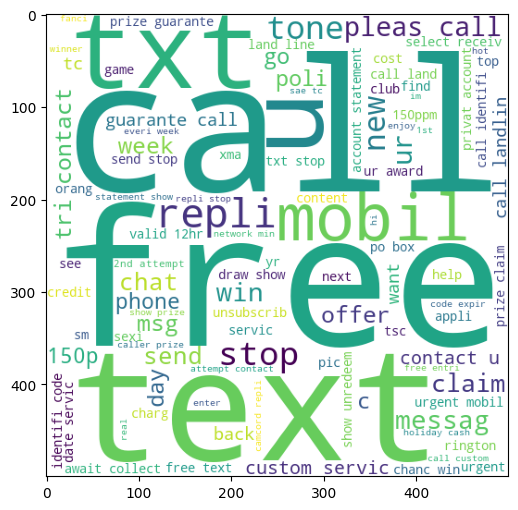

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [62]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

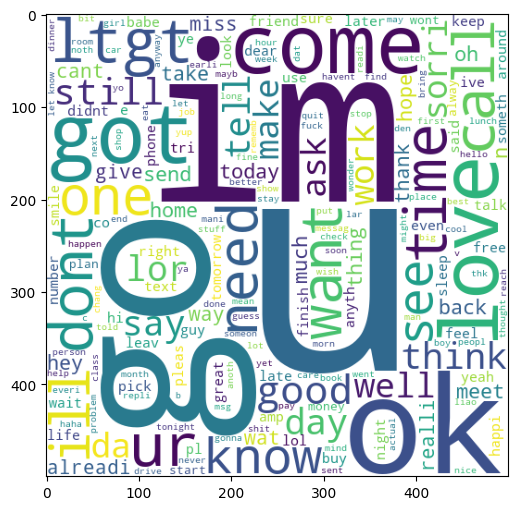

In [63]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [65]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

10803

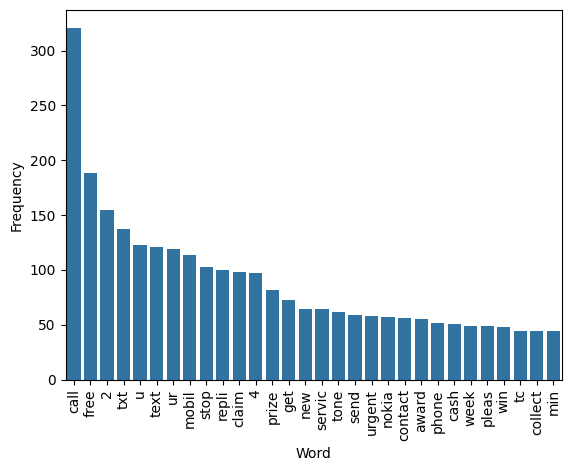

In [67]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the 30 most common words and their frequencies
spam_word_counts = Counter(spam_corpus).most_common(30)

# Convert the Counter data to a DataFrame
df_spam_words = pd.DataFrame(spam_word_counts, columns=['Word', 'Frequency'])

# Plot the bar chart
sns.barplot(x='Word', y='Frequency', data=df_spam_words)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for readability
plt.show()

In [68]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)

36720

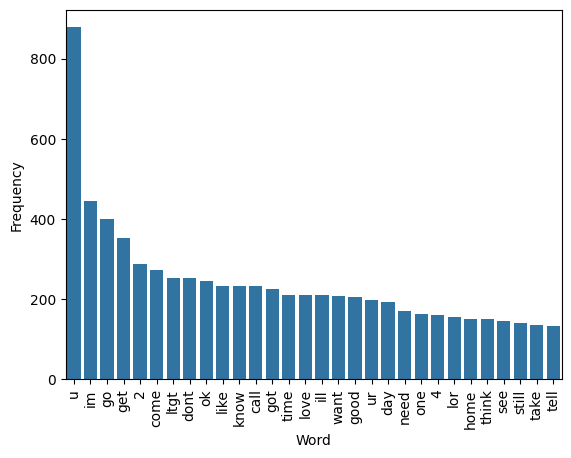

In [70]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the 30 most common words and their frequencies
ham_word_counts = Counter(ham_corpus).most_common(30)

# Convert the Counter data to a DataFrame
df_ham_words = pd.DataFrame(ham_word_counts, columns=['Word', 'Frequency'])

# Plot the bar chart
sns.barplot(x='Word', y='Frequency', data=df_ham_words)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for readability
plt.show()

In [71]:
#model building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
x.shape

(5169, 3000)

In [75]:
y = df['target'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb = GaussianNB
mnb = MultinomialNB
bnb = BernoulliNB

In [81]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
gnb = GaussianNB()

In [82]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[785 111]
 [ 25 113]]
0.5044642857142857


In [83]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
mnb = MultinomialNB()

In [84]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [85]:
from sklearn.naive_bayes import BernoulliNB

# Initialize the model
bnb = BernoulliNB()

In [86]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [87]:
#tfidf -->mnb

In [88]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [90]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb =  XGBClassifier(n_estimators=50, random_state=2)

In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' :xgb
}

In [92]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)  
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [93]:
 train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9748549323017408, 0.9666666666666667)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.86
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117
For  RF
Accuracy -  0.971953578336557
Precision -  0.9823008849557522


C:\Users\Aditi Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9375


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [ ]:
performance_df1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming performance_df1 is already defined
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
#model improvement

In [ ]:
#1. change the max_features parameter of tdidf

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [ ]:
performance_df.merge(temp_df,on='Algorithm')

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
